# 1 Day Simulation Visualization

In [168]:
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<h4> Exploring the data

In [169]:
# Connect to the database
conn = sqlite3.connect('../YClient/experiments/local_test.db')
c = conn.cursor()
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('sqlite_sequence',), ('hashtags',), ('post_hashtags',), ('mentions',), ('emotions',), ('post_emotions',), ('rounds',), ('follow',), ('reactions',), ('websites',), ('articles',), ('post',), ('recommendations',), ('voting',), ('user_interest',), ('interests',), ('post_topics',), ('user_mgmt',)]


In [170]:
# for each table, get the columns
tables = ['sqlite_sequence', 'hashtags', 'post_hashtags', 'mentions', 'emotions', 'post_emotions', 'rounds', 'follow', 'reactions', 'websites', 'articles', 'post', 'recommendations', 'voting', 'user_interest', 'interests', 'post_topics', 'user_mgmt']
for table in tables:
    print(table)
    c.execute("PRAGMA table_info(" + table +")")
    print(c.fetchall())

sqlite_sequence
[(0, 'name', '', 0, None, 0), (1, 'seq', '', 0, None, 0)]
hashtags
[(0, 'hashtag', 'TEXT', 1, None, 0), (1, 'id', 'INTEGER', 0, None, 1)]
post_hashtags
[(0, 'post_id', 'INTEGER', 0, None, 0), (1, 'hashtag_id', 'INTEGER', 0, None, 0), (2, 'id', 'INTEGER', 1, None, 1)]
mentions
[(0, 'id', 'INTEGER', 0, None, 1), (1, 'user_id', 'INT', 0, None, 0), (2, 'post_id', 'INTEGER', 0, None, 0), (3, 'round', 'INTEGER', 0, None, 0), (4, 'answered', 'INTEGER', 0, '0', 0)]
emotions
[(0, 'id', 'INTEGER', 1, None, 1), (1, 'emotion', 'TEXT', 1, None, 0)]
post_emotions
[(0, 'id', 'INTEGER', 0, None, 1), (1, 'post_id', 'INTEGER', 0, None, 0), (2, 'emotion_id', 'INTEGER', 0, None, 0)]
rounds
[(0, 'id', 'INTEGER', 1, None, 1), (1, 'day', 'INTEGER', 0, None, 0), (2, 'hour', 'INTEGER', 0, None, 0)]
follow
[(0, 'user_id', 'INTEGER', 1, None, 0), (1, 'follower_id', 'INTEGER', 1, None, 0), (2, 'id', 'INTEGER', 1, None, 1), (3, 'action', 'TEXT', 0, None, 0), (4, 'round', 'INTEGER', 0, None, 0)]
rea

<h4>Users

In [171]:
users_df = pd.read_sql_query("SELECT id, username FROM user_mgmt", conn)
users_df

,id,username
0,8,DebbieBrewer
1,4,HeatherSmith
2,5,JoshuaStanley
3,6,LindaYates
4,1,LisaMooreDVM
5,2,LisaShort
6,7,MichaelCherry
7,3,ScottBowers


Initially, the simulation began with 3 agents and progressively increased to 8 agents by the end of the one-day simulation.

<h4>Posts

In [172]:
posts_df = pd.read_sql_query("SELECT * FROM post", conn)
posts_df

,id,tweet,post_img,user_id,comment_to,thread_id,round,news_id,shared_from
0,1,comming election? #DemocracyNow #VotingForAll,None,4,-1,1,2,NaN,-1
1,2,As a fellow patriot and registered Republican...,None,3,1,1,4,NaN,-1
2,3,rather than the Kamala that was mentioned.,None,2,-1,3,5,1.0,-1
3,4,The Women Movement in particular which seemed...,None,4,-1,4,9,1.0,3
4,5,"\n\nAs an educated & organized voter, I believ...",None,4,-1,5,12,NaN,-1
5,6,That's so passionate and inspiring Heather! A...,None,2,5,5,16,NaN,-1
6,7,Another concern about prison system in our cou...,None,3,-1,7,18,2.0,-1
7,8,"I agree with your perspective, @HeatherSmith,...",None,3,4,4,18,NaN,-1
8,9,\n I couldn't agree more with you wholehearte...,None,4,6,5,23,NaN,-1
9,10,\n\nJust participated in a constituent meeting...,None,8,-1,10,28,NaN,-1


Total number of posts is 17

In [173]:
# count comments for each post
comments_query = """
SELECT
    p.id AS post_id,
    COUNT(c.id) AS comment_count
FROM
    post p
LEFT JOIN
    post c ON p.id = c.comment_to
GROUP BY
    p.id
ORDER BY
    comment_count DESC;
"""

comments_df = pd.read_sql_query(comments_query, conn)
comments_df


,post_id,comment_count
0,1,1
1,4,1
2,5,1
3,6,1
4,8,1
5,9,1
6,10,1
7,11,1
8,2,0
9,3,0


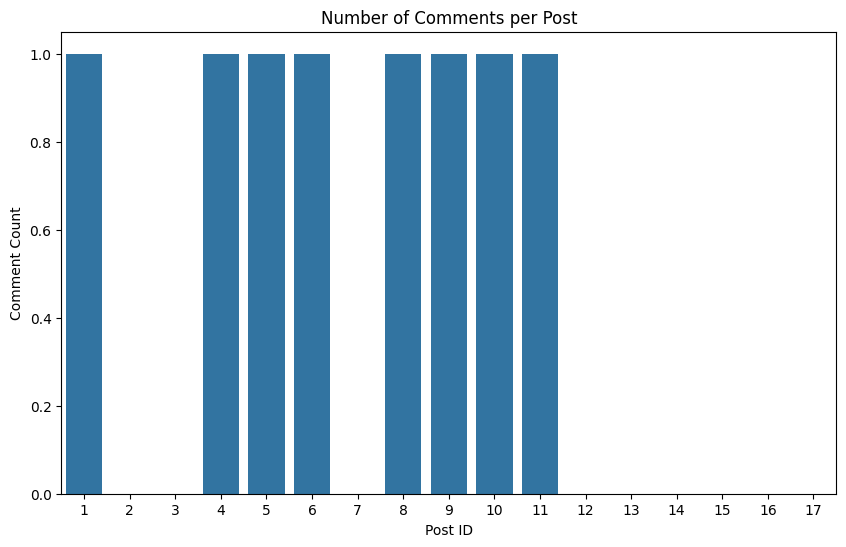

In [174]:
# plot the number of comments per post
blue_color = sns.color_palette()[0]
plt.figure(figsize=(10, 6))
sns.barplot(data=comments_df, x='post_id', y='comment_count', color=blue_color)

plt.title("Number of Comments per Post")
plt.xlabel("Post ID")
plt.ylabel("Comment Count")
plt.show()

Only a few posts have comments, while the majority remain without any, indicating a low level of interaction between the agents.

In [175]:
# Query for mentions 
mentions_query = """
    SELECT m.user_id, r.day, r.hour
    FROM mentions m
    JOIN rounds r ON m.round = r.id
"""
mentions_df = pd.read_sql(mentions_query, conn)

# Similarly, fetch other interaction data (follow, post, comment)
follow_query = """
    SELECT f.user_id, r.day, r.hour
    FROM follow f
    JOIN rounds r ON f.round = r.id
"""
follow_df = pd.read_sql(follow_query, conn)

post_query = """
    SELECT p.user_id, r.day, r.hour
    FROM post p
    JOIN rounds r ON p.round = r.id
"""
post_df = pd.read_sql(post_query, conn)

# Combine all interactions into one dataframe
mentions_df['interaction_type'] = 'mention'
follow_df['interaction_type'] = 'follow'
post_df['interaction_type'] = 'post'

# Concatenate all interaction dataframes
interaction_df = pd.concat([mentions_df, follow_df, post_df])


interaction_df['day'] = interaction_df['day'].apply(lambda x: 1 if x == 0 else x)  

# combine day and hour to create a timestamp
interaction_df['timestamp'] = pd.to_datetime(interaction_df['day'].astype(str) + '-' + interaction_df['hour'].astype(str), format='%j-%H')

# Count interactions by user and hour
interaction_df['hour'] = interaction_df['timestamp'].dt.hour
interaction_count = interaction_df.groupby(['user_id', 'interaction_type', 'hour']).size().reset_index(name='interaction_count')

interaction_count

,user_id,interaction_type,hour,interaction_count
0,2,follow,14,1
1,2,mention,21,1
2,2,post,3,1
3,2,post,14,1
4,3,mention,7,1
5,3,post,2,1
6,3,post,16,2
7,4,mention,16,1
8,4,post,0,1
9,4,post,7,1


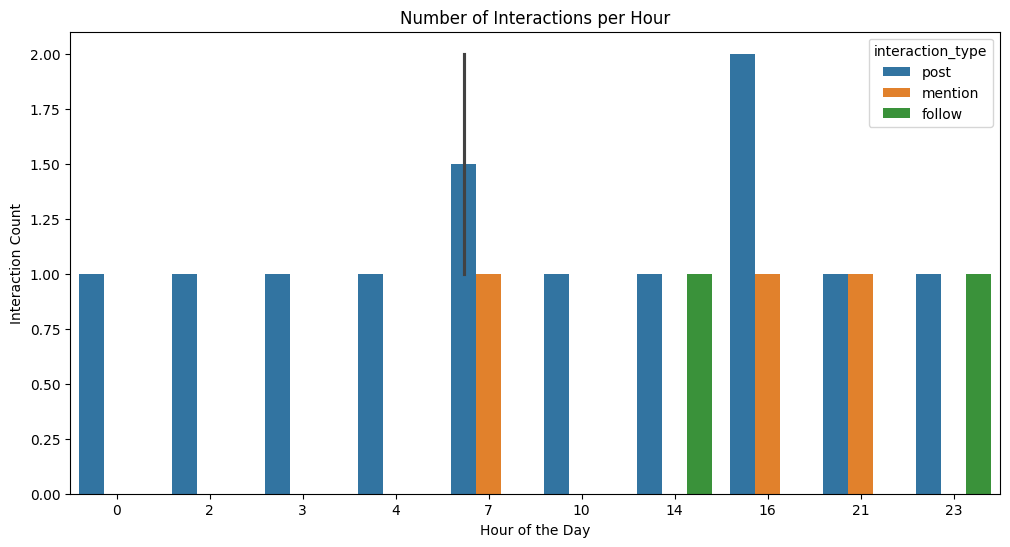

In [176]:
# plot in a bar chart the number of interactions per user per hour
plt.figure(figsize=(12, 6))
sns.barplot(data=interaction_count, x='hour', y='interaction_count', hue='interaction_type')
plt.title("Number of Interactions per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Interaction Count")
plt.show()

The results show diverse activity times and low posting behavio - 1 day simulation :'(

<h4>Graph of interactions

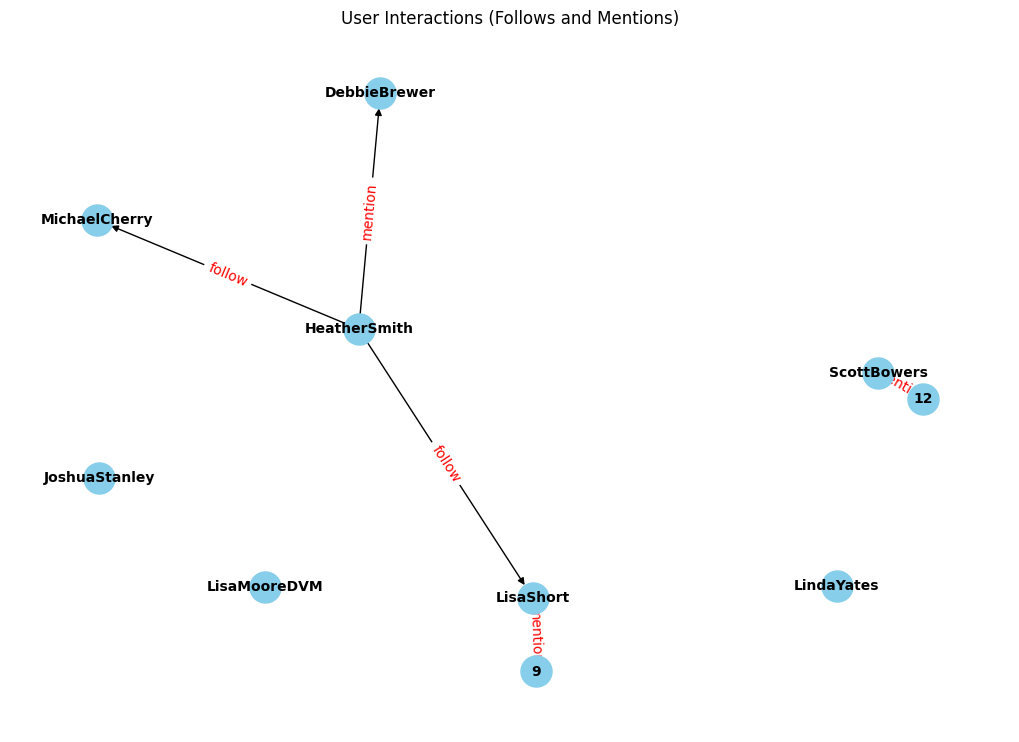

In [177]:
# Fetch follow interactions
follow_query = "SELECT follower_id, user_id FROM follow"
follow_df = pd.read_sql_query(follow_query, conn)

mention_query = "SELECT user_id AS mentioner_id, post_id AS mentioned_id FROM mentions"
mention_df = pd.read_sql_query(mention_query, conn)

users_query = "SELECT id, username FROM user_mgmt"
users_df = pd.read_sql_query(users_query, conn)

user_name_map = dict(zip(users_df['id'], users_df['username']))

# Initialize directed graph
G = nx.DiGraph()

# Add all users as nodes 
for user_id, username in user_name_map.items():
    G.add_node(user_id, label=username)

# Add follow interactions as edges
for _, row in follow_df.iterrows():
    G.add_edge(row['follower_id'], row['user_id'], type='follow')

# Add mention interactions as edges
if not mention_df.empty:
    for _, row in mention_df.iterrows():
        G.add_edge(row['mentioner_id'], row['mentioned_id'], type='mention')

# Plot the graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  

labels = {node: user_name_map.get(node, node) for node in G.nodes()}

nx.draw(
    G, pos, with_labels=True, labels=labels, node_size=500, node_color="skyblue", font_size=10, font_weight="bold"
)

edge_labels = nx.get_edge_attributes(G, 'type')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("User Interactions (Follows and Mentions)")
plt.show()


In [178]:
mention_df

,mentioner_id,mentioned_id
0,4,8
1,2,9
2,3,12


Where there is a node with a number, it means that the person mentions himself in the post with the number as id.


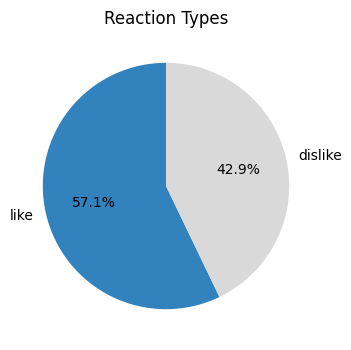

In [179]:
reactions_df = pd.read_sql_query("SELECT * FROM reactions", conn)

reaction_counts = reactions_df['type'].value_counts()

plt.figure(figsize=(4, 4))
reaction_counts.plot.pie(
    autopct='%1.1f%%', startangle=90, title="Reaction Types", cmap='tab20c'
)
plt.ylabel("")  
plt.show()


<h4> Number of of followers and followees for each user

In [180]:
follow_query = "SELECT follower_id, user_id FROM follow"
follow_df = pd.read_sql_query(follow_query, conn)

# Rename 'id' to 'user_id' in users_df to match other DataFrames
users_df.rename(columns={"id": "user_id"}, inplace=True)

# Count followers
followers_count = follow_df.groupby('user_id').size().reset_index(name='followers_count')

# Count followees
followees_count = follow_df.groupby('follower_id').size().reset_index(name='followees_count')

# Merge counts with all users to include everyone
user_counts = (
    users_df
    .merge(followers_count, on='user_id', how='left')  # Match on 'user_id'
    .merge(followees_count, left_on='user_id', right_on='follower_id', how='left')  # Match on 'follower_id'
    .drop(columns=['follower_id'])  
)

user_counts['followers_count'] = user_counts['followers_count'].fillna(0).astype(int)
user_counts['followees_count'] = user_counts['followees_count'].fillna(0).astype(int)

user_counts

,user_id,username,followers_count,followees_count
0,8,DebbieBrewer,0,0
1,4,HeatherSmith,0,2
2,5,JoshuaStanley,0,0
3,6,LindaYates,0,0
4,1,LisaMooreDVM,0,0
5,2,LisaShort,1,0
6,7,MichaelCherry,1,0
7,3,ScottBowers,0,0


<h4>Number pf posts per user

In [181]:
user_posts = post_df['user_id'].value_counts().reset_index()
user_posts.columns = ['user_id', 'posts']
user_posts

,user_id,posts
0,7,5
1,4,4
2,3,3
3,2,2
4,8,1
5,6,1
6,5,1


<h4>Given nd received reaction per user

In [183]:
reactions_df = pd.read_sql_query("SELECT * FROM reactions", conn)
emotions_df = pd.read_sql_query("SELECT * FROM emotions", conn)

user_reactions = pd.merge(reactions_df, emotions_df, left_on='id', right_on='id')

# Count reactions given by each user
user_reactions_given = user_reactions['user_id'].value_counts().reset_index()
user_reactions_given.columns = ['user_id', 'reactions_given']

# Count reactions received by each user
post_reactions = user_reactions['post_id'].value_counts().reset_index()
post_reactions.columns = ['post_id', 'reactions_received']

user_reactions_received = pd.merge(post_reactions, post_df, left_on='post_id', right_on='user_id')
user_reactions_received = user_reactions_received[['user_id', 'reactions_received']]
user_reactions = pd.merge(user_reactions_given, user_reactions_received, on='user_id', how='outer').fillna(0)
user_reactions

,user_id,reactions_given,reactions_received
0,3,2.0,0.0
1,4,2.0,0.0
2,6,0.0,2.0
3,7,3.0,0.0
4,8,0.0,1.0
